## Importy

In [560]:
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer

## Funkcje pomocnicze

In [561]:
def make_signal(function, pulsation, amplitude=1):
    return (lambda t: amplitude* function(pulsation * t)), 2 * np.pi / pulsation

def sample_signal(signal, period, num_samples, sampling_frequency=None):
    freq = 1 / period
    if sampling_frequency is not None:
        delta_t = 1 / sampling_frequency
        period = num_samples * delta_t
    else:
        delta_t = period / num_samples
    dirac_d = np.arange(0, period, delta_t)
    delta_f = freq / num_samples
    buckets = np.arange(0, freq, delta_f)
    return signal(dirac_d), dirac_d, buckets

make_discrete_signal = lambda signal, num_samples: sample_signal(signal, num_samples, num_samples)[0]



# Zad 1
## Spróbkowanie sygnału i wyznaczenie widm

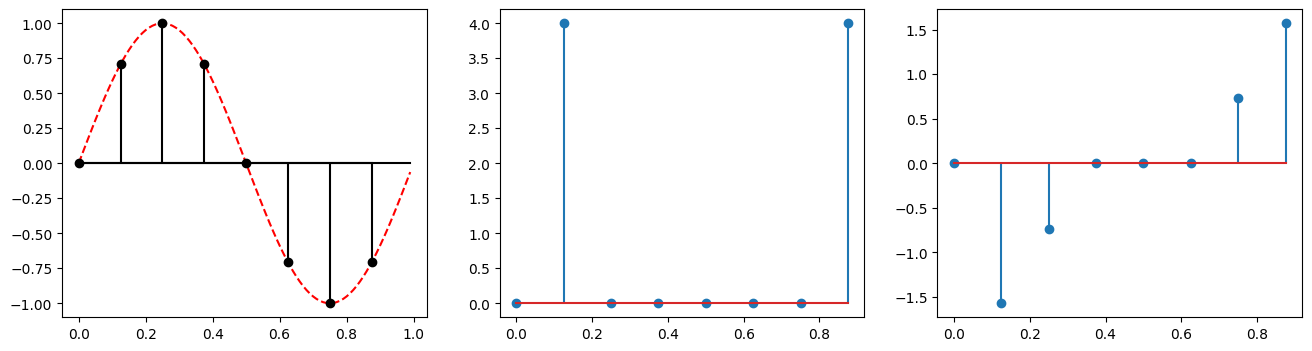

In [562]:
N = 8
sin, period = make_signal(
    function=np.sin, 
    pulsation=2 * np.pi
)

samples, probing_signal, buckets = sample_signal(sin, period, N)
spectrum = np.fft.fft(samples)
freq_spectrum = np.abs(spectrum)
phase_spectrum = np.angle(spectrum)

X_cont = np.arange(0, period, 0.01)

_, ax = plt.subplots(1, 3, figsize=(16, 4))

ax[0].plot(X_cont, sin(X_cont), "--", color="red")
ax[0].stem(probing_signal, samples, linefmt='k-', markerfmt='o', basefmt='k-')
ax[0].plot(X_cont, np.zeros(X_cont.shape), color="black")  # line

ax[1].stem(buckets, freq_spectrum)

ax[2].stem(buckets, phase_spectrum)

plt.show()

## Weryfikacja twierdzenia Parsevala
$$ \sum_{n=0}^{N-1} |x[n]|^2 = \frac{1}{N} \sum_{k=0}^{N-1} |X[k]|^2 $$

In [563]:
sum_abs_squares = lambda x: np.sum(np.abs(x)**2)

sum_abs_squares(samples) == 1/N * sum_abs_squares(spectrum)


True

## Czas wykonania FFT w zależności od liczby próbek

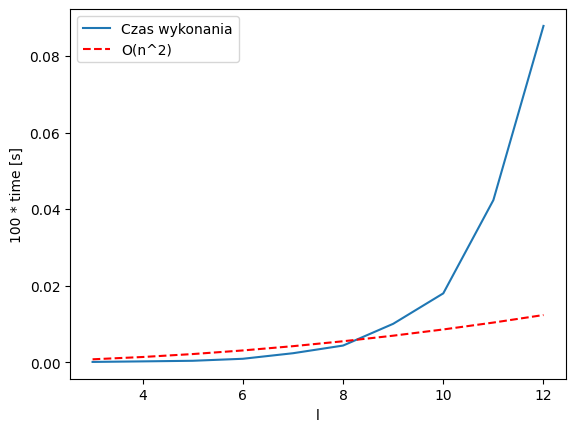

In [564]:
tested_n = range(3, 12+1)
results = []
for n in tested_n:
    samples, _, _ = sample_signal(sin, period, 1000*2**n)
    start = timer()
    np.fft.fft(samples)
    results.append(timer() - start)
    

_, ax = plt.subplots()

ax.plot(tested_n, results)
ax.set_xlabel("l")
ax.set_ylabel("100 * time [s]")
comp = [results[0] * n**2 for n in tested_n]
ax.plot(tested_n, comp, "--", color="red")

plt.legend(["Czas wykonania", "O(n^2)"])


plt.show()

# Zad 2

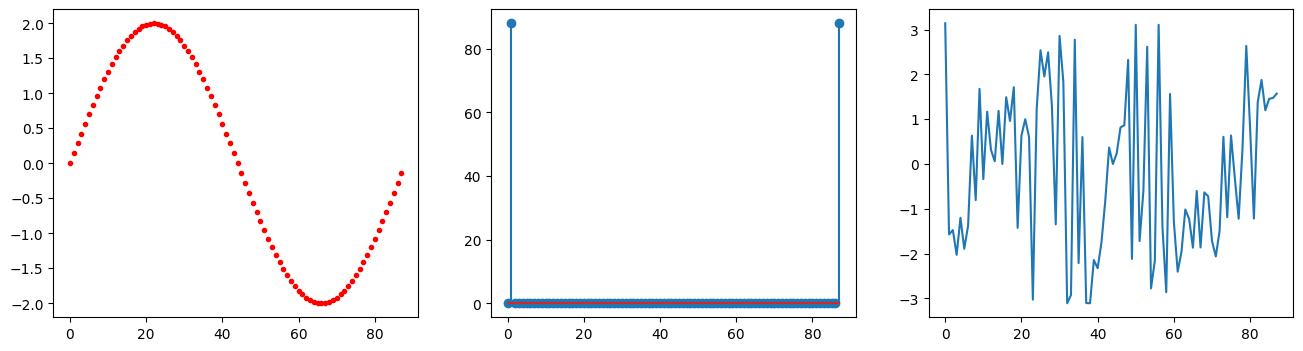

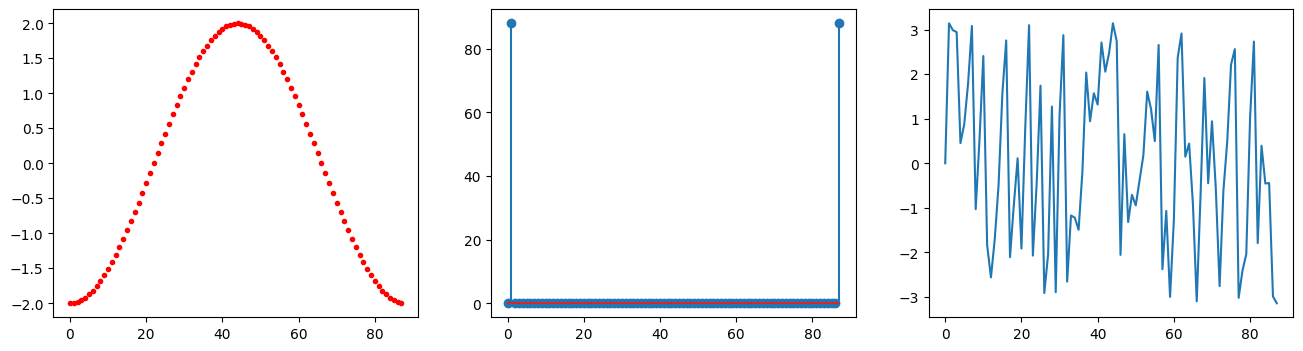

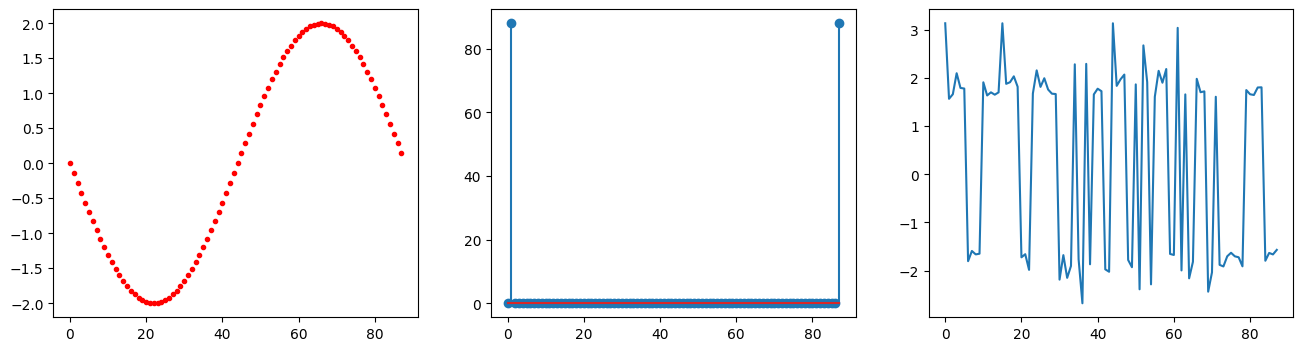

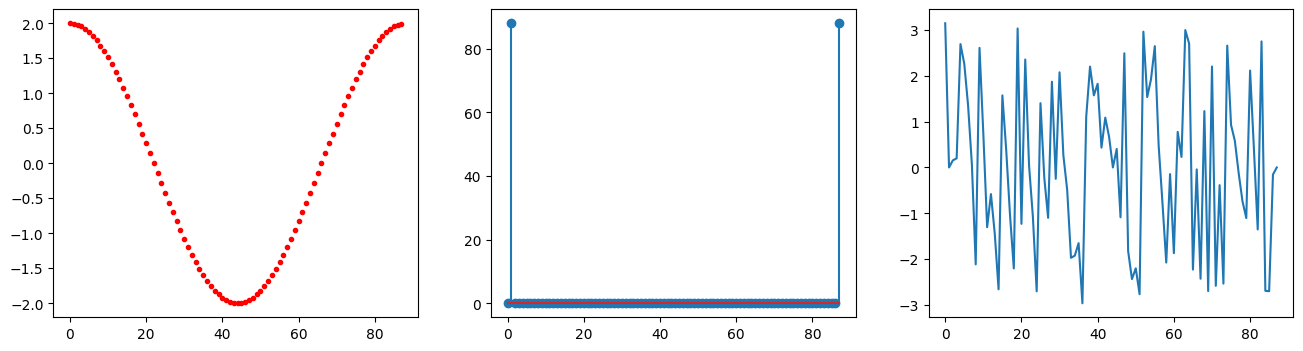

In [565]:
N = 88
A = 2
shifts = [0, N/4, N/2, 3*N/4]
sin, _ = make_signal(
        function=np.sin, 
        pulsation=2 * np.pi / N, 
        amplitude=A
    )

for shift in shifts:   
    shifted = lambda n: sin(n - shift)
    
    samples = make_discrete_signal(shifted, N)
    
    spectrum = np.fft.fft(samples)
    freq_spectrum = np.abs(spectrum)
    phase_spectrum = np.angle(spectrum)
    
    _, ax = plt.subplots(1, 3, figsize=(16, 4))
    
    ax[0].plot(samples, ".", color="red")
    ax[1].stem(freq_spectrum)
    ax[2].plot(phase_spectrum)
    
plt.show()


# Zad 3

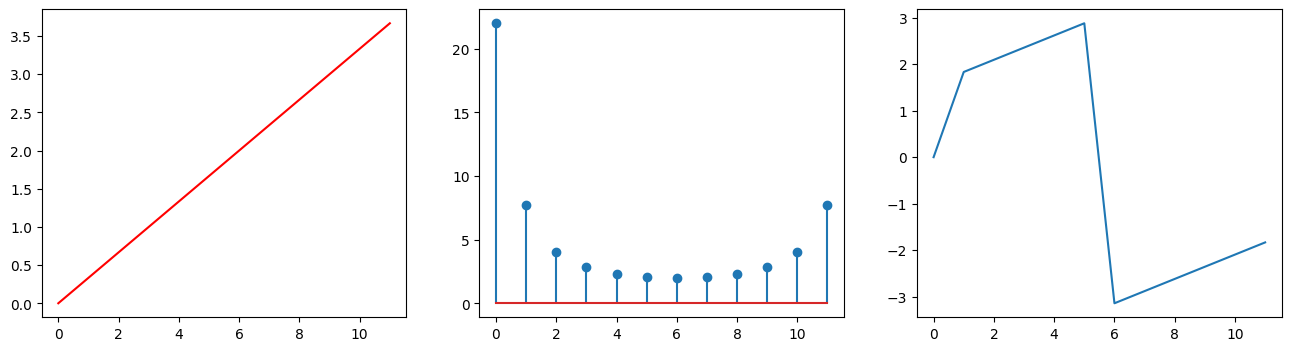

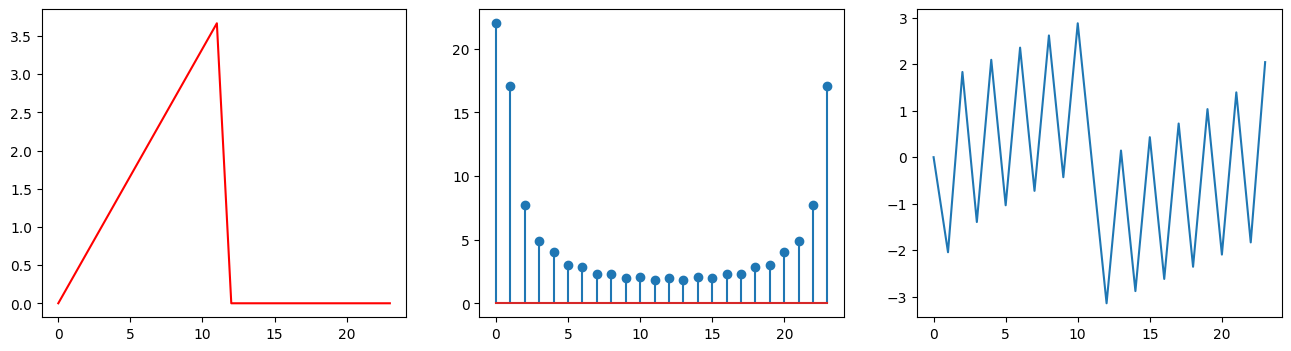

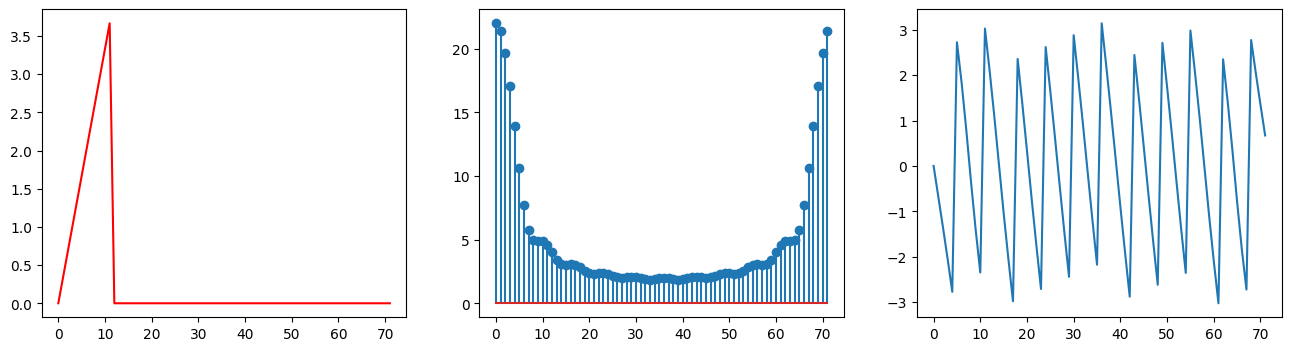

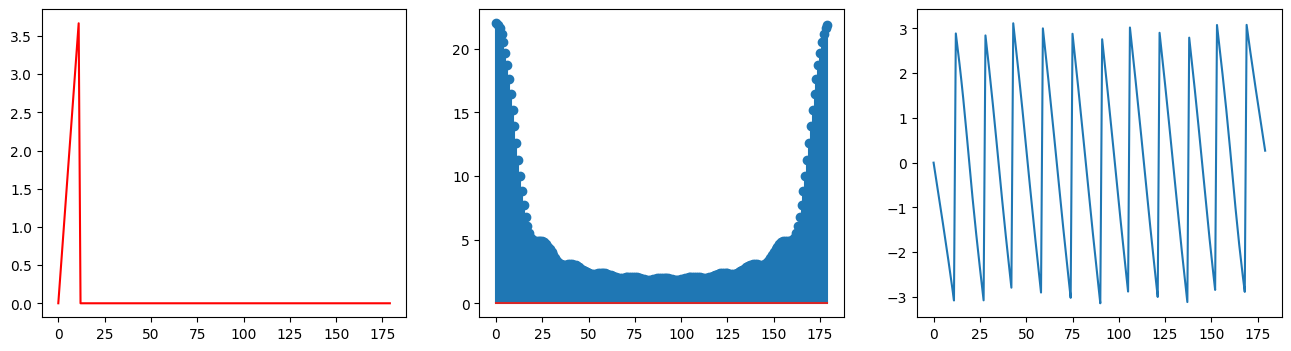

In [566]:
A = 4
N = 12
signal = lambda n: A * (np.mod(n, N) / N)
samples = make_discrete_signal(signal, N)

n_zeros_list = [0, N, 4*N, 9*N]
    
for n_zeros in n_zeros_list:
    samples = np.concatenate((samples, np.zeros(n_zeros)))
    spectrum = np.fft.fft(samples)
    freq_spectrum = np.abs(spectrum)
    phase_spectrum = np.angle(spectrum)
    
    _, ax = plt.subplots(1, 3, figsize=(16, 4))
    
    ax[0].plot(samples, "-", color="red")
    ax[1].stem(freq_spectrum)
    ax[2].plot(phase_spectrum)


Dopełnienie sygnału zerami sprawia, że widmo ma wyższą rozdzielczość. Dzieje się tak ponieważ dopełniając zwiększamy parametr N w sygnale, co z kolei zwiększa liczbę punktów w widmie i zmniejsza rozmiary _kubełków_ częstotliwości w widmie.

# Zad 4

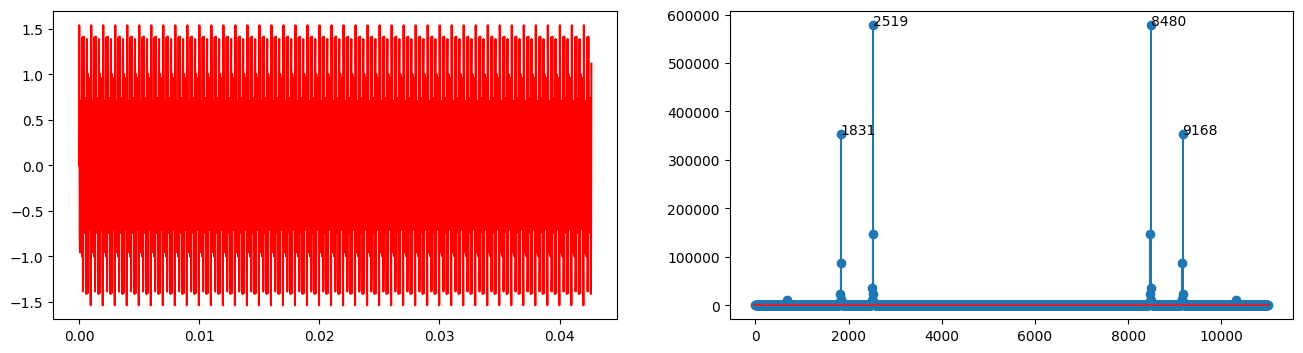

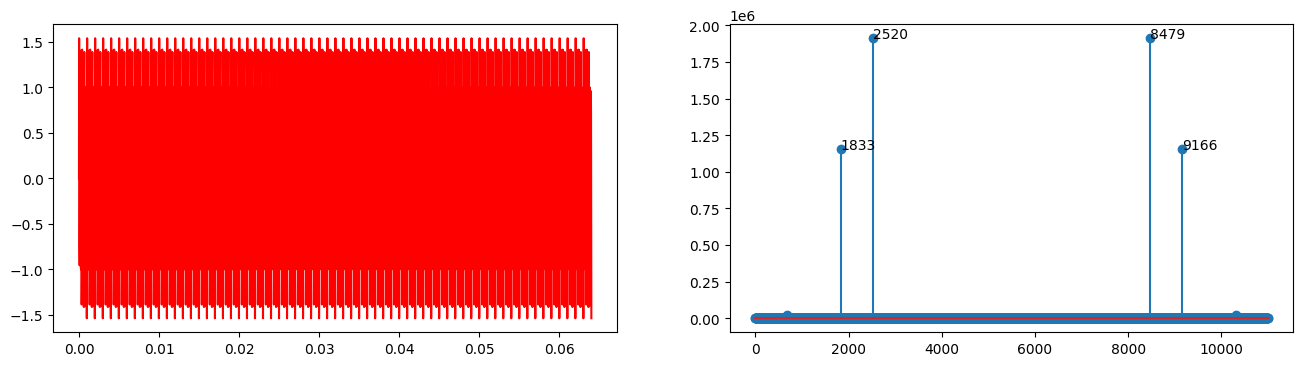

In [567]:
A_list = [0.1, 0.7, 0.9]
f_list = [3000, 8000, 11000]
N = 2048
sampling_frequency = 48000
largest_frequency = f_list[-1]
sampling_period = 1/sampling_frequency
n_labels = 4

signal = lambda x: sum([A * np.sin(2 * np.pi * f * x) for A, f in zip(A_list, f_list)])


samples, probing_signal, buckets = sample_signal(signal, 1/largest_frequency, N, sampling_frequency)
spectrum = np.fft.fft(samples)
spectral_power_density = np.abs(spectrum)**2

_, ax = plt.subplots(1, 2, figsize=(16, 4))

ax[0].plot(probing_signal, samples, "-", color="red")

ax[1].stem(buckets, spectral_power_density)

largest_indices = np.argsort(spectral_power_density)[-n_labels:]  

for i in largest_indices:
    ax[1].annotate(f'{int(buckets[i])}', xy=(buckets[i], spectral_power_density[i]))


N = (3/2) * N

samples, probing_signal, buckets = sample_signal(signal, 1/largest_frequency, N, sampling_frequency)
spectrum = np.fft.fft(samples)
spectral_power_density = np.abs(spectrum)**2

_, ax = plt.subplots(1, 2, figsize=(16, 4))
ax[0].plot(probing_signal, samples, "-", color="red")
ax[1].stem(buckets, spectral_power_density)

largest_indices = np.argsort(spectral_power_density)[-n_labels:]  

for i in largest_indices:
    ax[1].annotate(f'{int(buckets[i])}', xy=(buckets[i], spectral_power_density[i]))

plt.show()